In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import ensemble
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [28]:
style.use('fivethirtyeight')
%matplotlib inline

In [29]:
TRAIN_DATASET_PATH = "../Desktop/Study/Алгоритмы анализа данных/материалы/Lesson_8/train.csv"
TEST_DATASET_PATH = '../Desktop/Study/Алгоритмы анализа данных/материалы/Lesson_8/test.csv'

In [30]:
train_data = pd.read_csv(TRAIN_DATASET_PATH)
test_data = pd.read_csv(TEST_DATASET_PATH)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [32]:
train_data.shape

(10000, 12)

In [33]:
train_data.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [34]:
train_data.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
5,5,33.0,4.0,1650.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
6,6,53.0,1.0,2100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
7,7,60.0,3.0,1800.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
8,8,39.0,1.0,1200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0
9,9,49.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0


Оценка распредения целевой переменной в разрезе других признаков

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


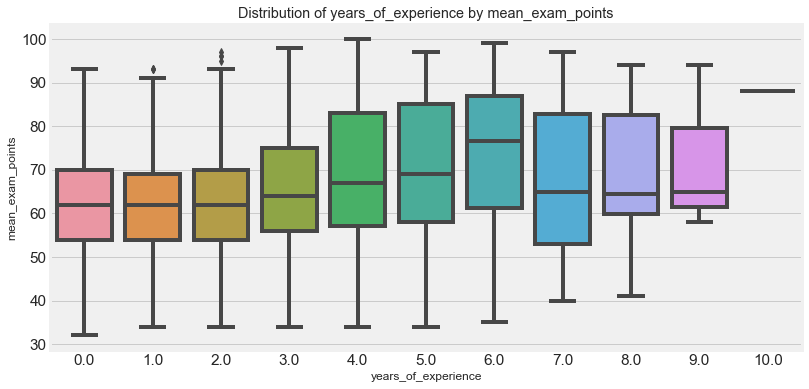

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(train_data['years_of_experience'], train_data['mean_exam_points'])
plt.xlabel('years_of_experience')
plt.ylabel('mean_exam_points')
plt.title('Distribution of years_of_experience by mean_exam_points')
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


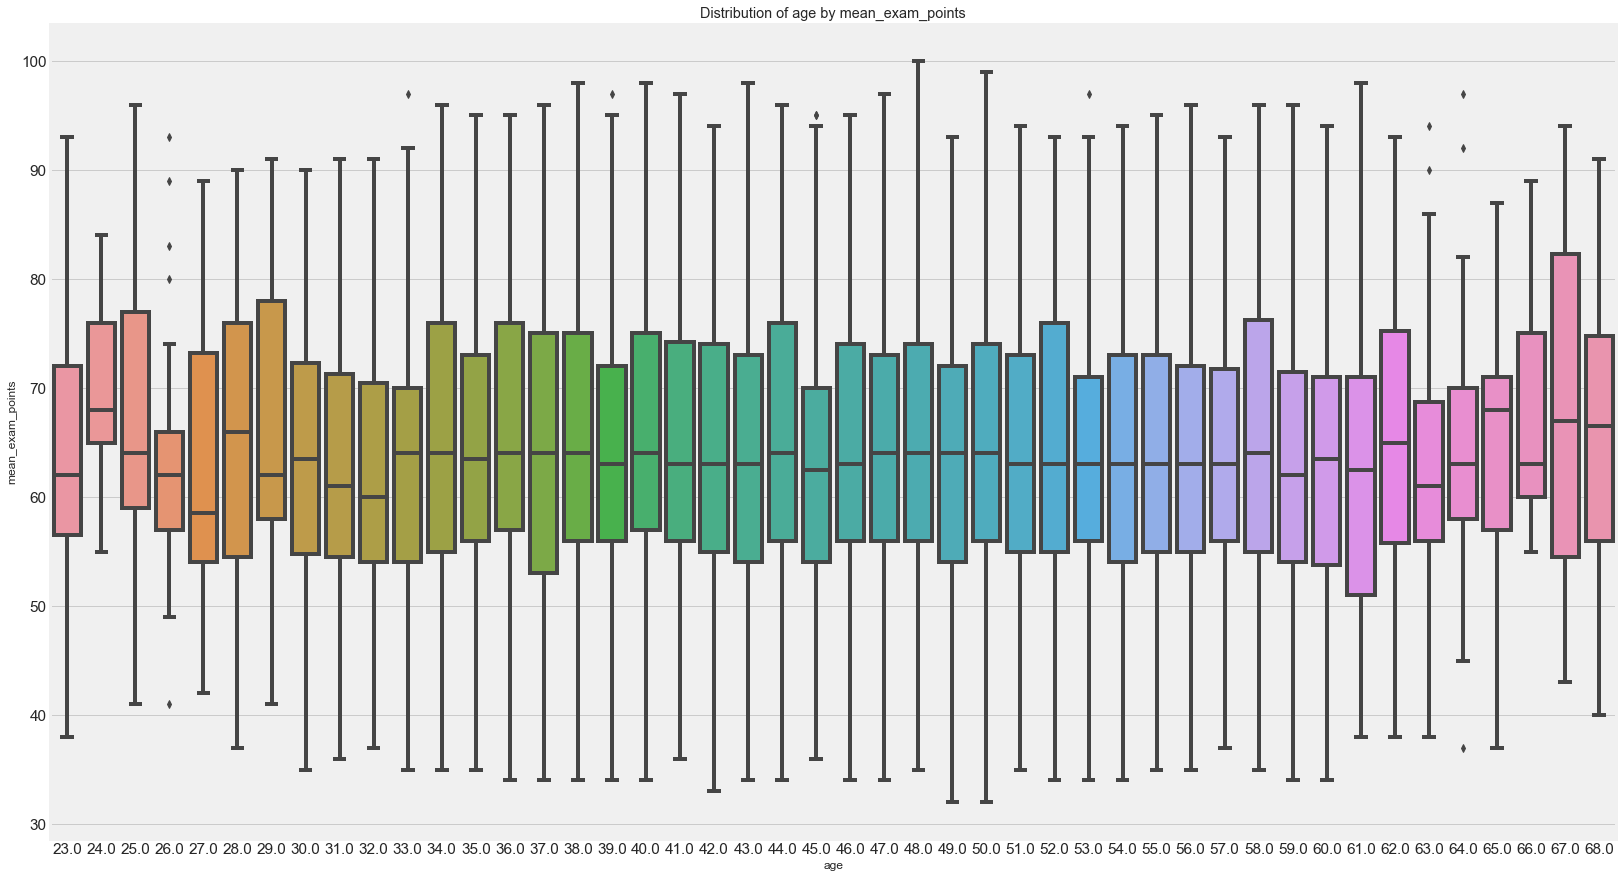

In [36]:
plt.figure(figsize=(25, 15))
sns.boxplot(train_data['age'], train_data['mean_exam_points'])
plt.xlabel('age')
plt.ylabel('mean_exam_points')
plt.title('Distribution of age by mean_exam_points')
plt.show();

# Анализ количественных признаков

In [37]:
# отбираем количественные признаки
df_num_features = train_data.select_dtypes(include='float64')

In [38]:
num_features = pd.DataFrame(df_num_features)

In [39]:
num_features

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,78.0
9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


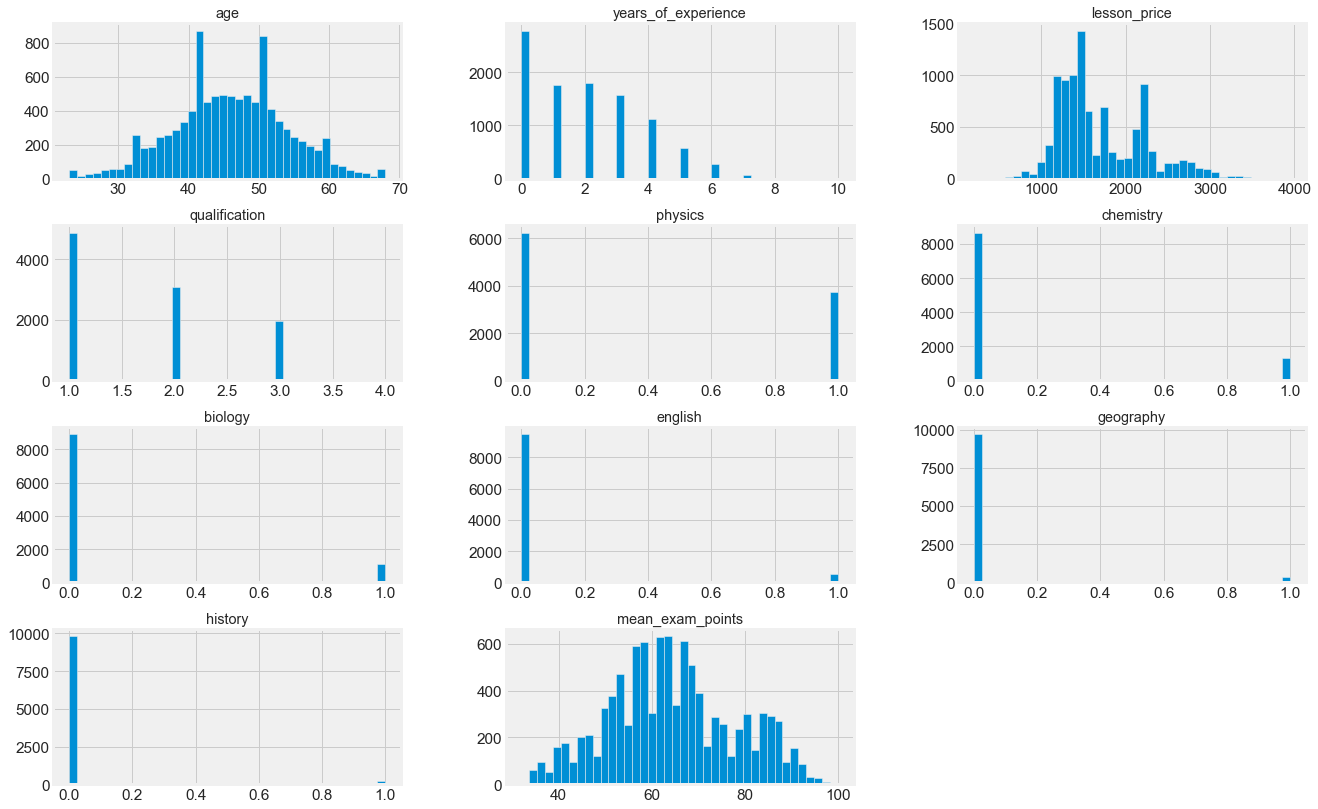

In [40]:
num_features.hist(figsize=(20, 14), bins=40, grid=True);

In [41]:
df_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


# Корреляция признаков

<ipython-input-42-56b4c333a338>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)  # отрезаем лишнюю половину матрицы


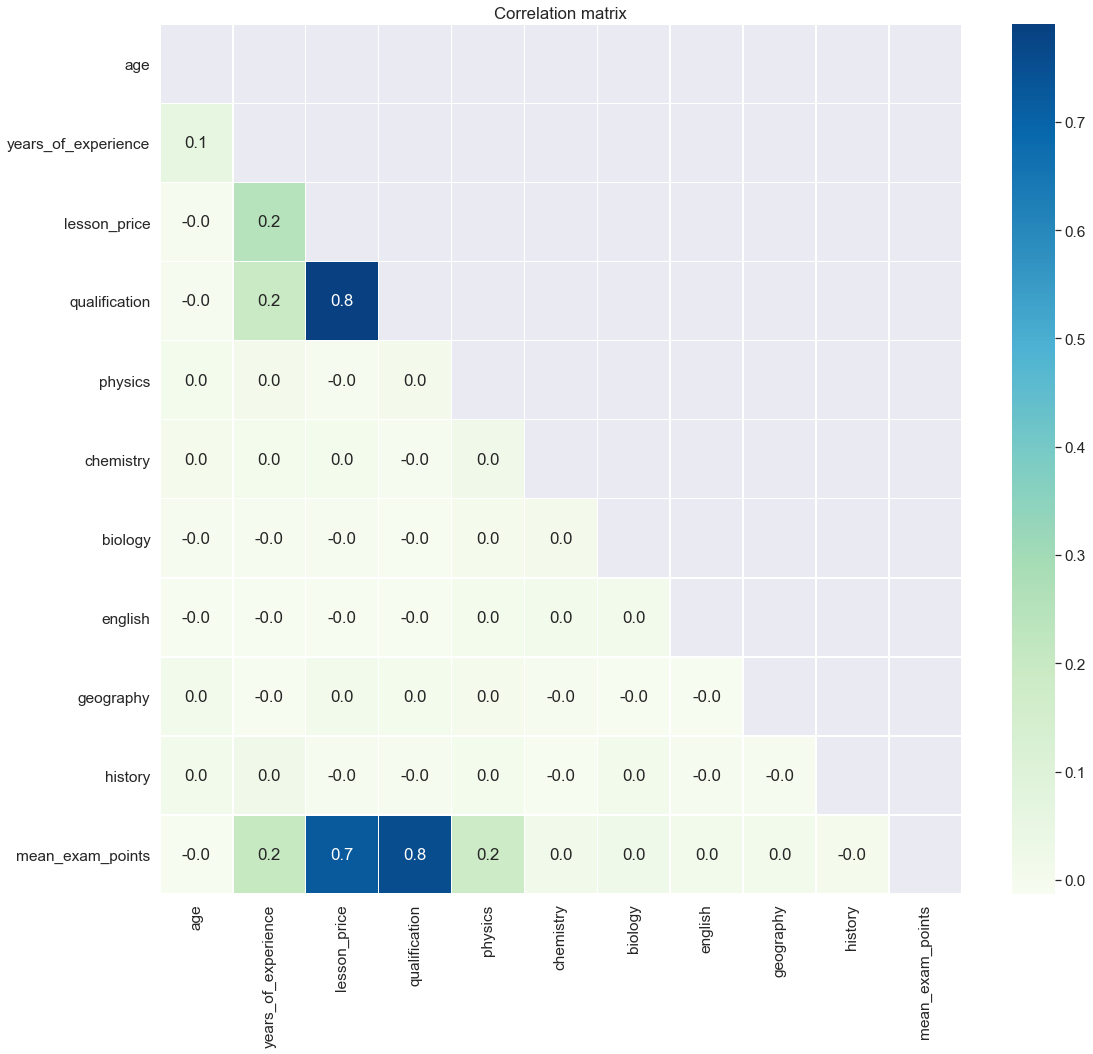

In [42]:
corr = num_features.corr()
plt.figure(figsize = (16, 16))
mask = np.zeros_like(corr, dtype=np.bool)  # отрезаем лишнюю половину матрицы
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.4)
sns.heatmap(num_features.corr(), mask=mask, annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show();

In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


# Заполнение пропусков

In [44]:
train_data = train_data.sort_values('mean_exam_points')
test_data = test_data.sort_values('age')

In [45]:
train_data

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
9037,9037,50.0,0.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
1772,1772,49.0,0.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
665,665,42.0,0.0,1550.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
6515,6515,43.0,4.0,1700.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
9674,9674,50.0,1.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5564,5564,61.0,6.0,3200.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,98.0
8655,8655,43.0,4.0,2650.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,98.0
3625,3625,40.0,3.0,2800.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,98.0
234,234,50.0,6.0,2750.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,99.0


In [46]:
test_data

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
4703,14703,23.0,0.0,1150.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4718,14718,23.0,2.0,2550.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3333,13333,23.0,0.0,1700.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
5605,15605,23.0,1.0,1450.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
7842,17842,23.0,2.0,1350.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1777,11777,68.0,0.0,1450.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4020,14020,68.0,2.0,2300.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
6437,16437,68.0,1.0,1100.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
9282,19282,68.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Проверяем данные на выбросы

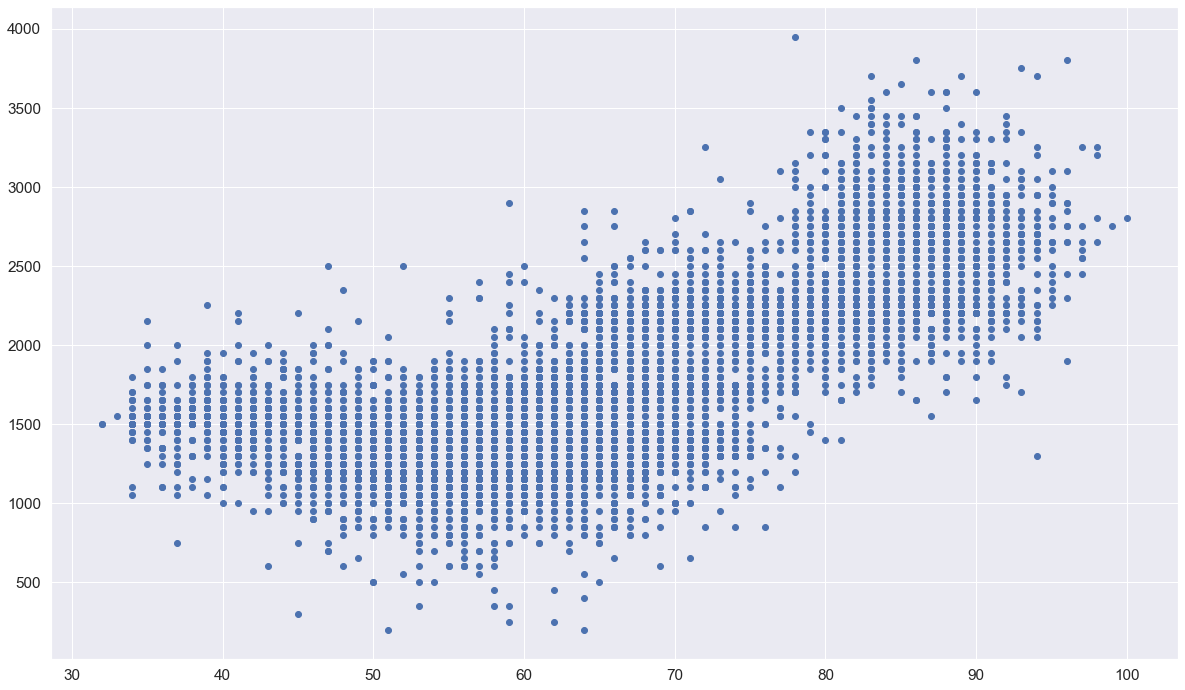

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 12  # меняем размер графиков по умолчанию

plt.scatter(train_data.mean_exam_points, train_data.lesson_price )

# Создаем и обучаем модель

In [48]:
X_train = pd.get_dummies(train_data)

In [49]:
X_train.drop("mean_exam_points", axis=1, inplace=True)
X_train.drop("Id", axis=1, inplace=True)
y_train = train_data.mean_exam_points

model1 = ensemble.GradientBoostingRegressor(n_estimators=442, max_depth=5, min_samples_split=2,
                                           learning_rate=0.1, loss='ls', random_state=42)

model2 = RandomForestRegressor(n_estimators=1442, max_depth=18, random_state=42, max_features=7)

model = VotingRegressor([('model1', model1), ('model2', model2)])

model.fit(X_train, y_train)

VotingRegressor(estimators=[('model1',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=442,
                                                       random_state=42)),
                            ('model2',
                             RandomForestRegressor(max_depth=18, max_features=7,
                                                   n_estimators=1442,
                                                   random_state=42))])

In [50]:
X_test = pd.get_dummies(test_data)
X_test.drop("Id", axis=1, inplace=True)
test_data["mean_exam_points"] = model.predict(X_test)

In [51]:
test_data.loc[:, ['Id', 'mean_exam_points']].to_csv('../Desktop/Study/Алгоритмы анализа данных/материалы/Lesson_8/predictions.csv', index=False)